# Cardiovascular Disease dataset

The dataset consists of 70 000 records of patients data, 11 features + target.

source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# 1.0 Import dependencies

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import os 
import pickle

# 2.0 Data Loading

In [3]:
#data loading
df = pd.read_csv('cardio_train.csv', sep= ";") # data seperated by ';'
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110,80,1.0,1,0,0.0,1,0
1,1,20228,1,156.0,85.0,140,90,3.0,1,0,0.0,1,1
2,2,18857,1,165.0,64.0,130,70,3.0,1,0,0.0,0,1
3,3,17623,2,169.0,82.0,150,100,1.0,1,0,0.0,1,1
4,4,17474,1,156.0,56.0,100,60,1.0,1,0,0.0,0,0


##  2.1 Variable description
    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# 3.0 Data Inspection

## 3.1 Brief Summary of the data

In [4]:

df.describe().T
#there is some ridiculous value such as min of weight and min of ap_hi

,count,mean,std,min,25%,50%,75%,max
id,70003.0,49970.283431,28852.529858,0.0,25002.5,50000.0,74887.5,99999.0
age,70003.0,19468.876134,2467.212795,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70003.0,1.349585,0.476842,1.0,1.0,1.0,2.0,2.0
height,70001.0,164.359023,8.210026,55.0,159.0,165.0,170.0,250.0
weight,70002.0,74.206013,14.396345,10.0,65.0,72.0,82.0,200.0
ap_hi,70003.0,128.817479,154.008162,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70003.0,96.629987,188.468505,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70001.0,1.366909,0.680255,1.0,1.0,1.0,2.0,3.0
gluc,70003.0,1.226476,0.572299,1.0,1.0,1.0,1.0,3.0
smoke,70003.0,0.088125,0.283478,0.0,0.0,0.0,0.0,1.0


## 3.2 Total columns and rows of the data and also the data type of each columns

In [5]:
df.info()
# can see there non-null count is not the same so will drop it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70003 entries, 0 to 70002
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70003 non-null  int64  
 1   age          70003 non-null  int64  
 2   gender       70003 non-null  int64  
 3   height       70001 non-null  float64
 4   weight       70002 non-null  float64
 5   ap_hi        70003 non-null  int64  
 6   ap_lo        70003 non-null  int64  
 7   cholesterol  70001 non-null  float64
 8   gluc         70003 non-null  int64  
 9   smoke        70003 non-null  int64  
 10  alco         70002 non-null  float64
 11  active       70003 non-null  int64  
 12  cardio       70003 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


## 3.3 Unique Data for each Columns

This will help detect anomalies such as in gender, cholestrol and most categorical features


In [ ]:
# see unique data for each column

df.nunique()

# we can see all output are as expected

age             28
gender           2
height         109
weight         287
ap_hi          153
ap_lo          157
cholesterol      3
gluc             3
smoke            2
alco             2
active           2
cardio           2
dtype: int64

# 4.0 Data Cleaning

## 4.1 Dropping NaN and duplicates

In [6]:
#drop NaN
missing_data = df.isna().sum() # checking sum of NaN for each column
print(missing_data)
df = df.dropna()
# detect duplicate and drop it
df.drop_duplicates(inplace= True)

id             0
age            0
gender         0
height         2
weight         1
ap_hi          0
ap_lo          0
cholesterol    2
gluc           0
smoke          0
alco           1
active         0
cardio         0
dtype: int64


## 4.2 Dropping unnecessary columns

In [7]:
# dropping id
# does not contribute anything meaningful
df= df.drop('id', axis= 1)

# 5.0 Feature Engineering

## 5.1 Age from days to years

In [8]:

# to make the data more readable and meaningful
df['age'] = df['age'] // 365.25

## 5.2 Changing the data type for columns

After checking the data type of each column, we can see some of it does not follow the 2.1 Variable Description. Therefore, we need to change it.

In [9]:
df.info() #checking the type of each feature
# need to be int --> age, height ,ap hi, ap lo
# binary --> gender , cholestrol , glucose , smoking ,alco ,active, cardio(target)
# float--> weight

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69994 entries, 0 to 70002
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69994 non-null  float64
 1   gender       69994 non-null  int64  
 2   height       69994 non-null  float64
 3   weight       69994 non-null  float64
 4   ap_hi        69994 non-null  int64  
 5   ap_lo        69994 non-null  int64  
 6   cholesterol  69994 non-null  float64
 7   gluc         69994 non-null  int64  
 8   smoke        69994 non-null  int64  
 9   alco         69994 non-null  float64
 10  active       69994 non-null  int64  
 11  cardio       69994 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.9 MB


In [10]:
#changing data type to its intended type
df[['age','height', 'ap_hi', 'ap_lo']]=df[['age','height', 'ap_hi', 'ap_lo']].astype(int)


In [11]:
df.info() # check the changes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69994 entries, 0 to 70002
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69994 non-null  int64  
 1   gender       69994 non-null  int64  
 2   height       69994 non-null  int64  
 3   weight       69994 non-null  float64
 4   ap_hi        69994 non-null  int64  
 5   ap_lo        69994 non-null  int64  
 6   cholesterol  69994 non-null  float64
 7   gluc         69994 non-null  int64  
 8   smoke        69994 non-null  int64  
 9   alco         69994 non-null  float64
 10  active       69994 non-null  int64  
 11  cardio       69994 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.9 MB


## 5.3 Adding BMI columns

In [ ]:

# add bmi column
df["bmi"] = df["weight"] / (df["height"]/100)**2


# 6.0 Data Preprocessing

## 6.1 Filter out the outliers for weight and height using IQR

In [13]:
# Filter out outliers for weight using IQR

Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1


df = df[~((df['weight'] < (Q1 - 1.5 * IQR)) | (df['weight'] > (Q3 + 1.5 * IQR)))]


In [14]:
# Filter out outliers for height using IQR

Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

# filter out outliers for height
df = df[~((df['height'] < (Q1 - 1.5 * IQR)) | (df['height'] > (Q3 + 1.5 * IQR)))]


## 6.2 Filtering ap_hi and ap_lo values

As some of it seems illogical such as negative values.

In [16]:
df['ap_hi'] = np.where(df['ap_hi'] > 250, 250, np.where(df['ap_hi'] < 0, 0, df['ap_hi']))
df['ap_lo'] = np.where(df['ap_lo'] > 200, 200, np.where(df['ap_lo'] < 0, 0, df['ap_lo']))


## 6.3 Finding the correlation and correlation between features and target

by the help of Cramers Function

In [17]:
#Cramers Function

def cramers_corrected_stat(confusion_matrix):

    """ calculate Cramers V statistic for categorial-categorial association.

        uses correction from Bergsma and Wicher,

        Journal of the Korean Statistical Society 42 (2013): 323-328

    """

    chi2 = ss.chi2_contingency(confusion_matrix)[0]

    n = confusion_matrix.sum()

    phi2 = chi2/n

    r,k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  

    rcorr = r - ((r-1)**2)/(n-1)

    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

### Seperating Categorical data and non-categorical data

In [18]:

con = ['age','height','weight','ap_hi','ap_lo','bmi']
cat = df.drop(labels=con ,axis =1).columns
print(cat)


Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], dtype='object')


### Finding correlation between categorical data

In [19]:
# correlation of cat- cat data

for i in cat:
    print(i)
    matrix = pd.crosstab(df[i],df['cardio']).to_numpy()
    print(cramers_corrected_stat(matrix))

gender
0.0040762043182225845
cholesterol
0.22006494284026973
gluc
0.09040216672736333
smoke
0.01823533517557269
alco
0.007841375914495016
active
0.03560770181717081
cardio
0.9999704614028138


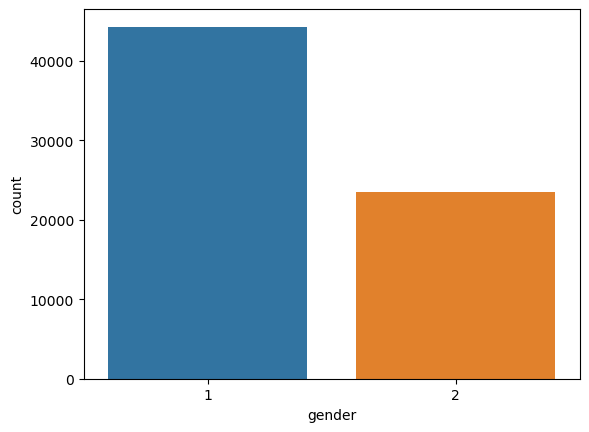

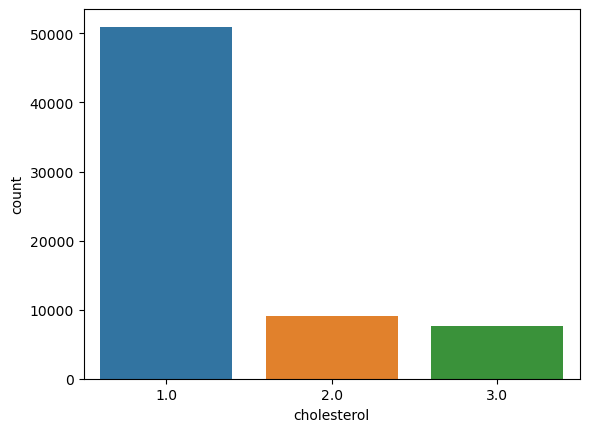

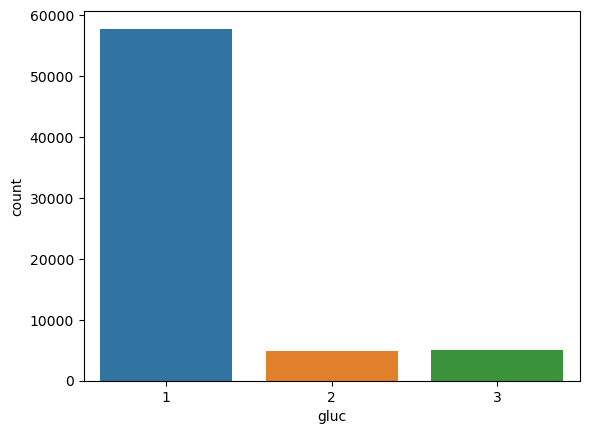

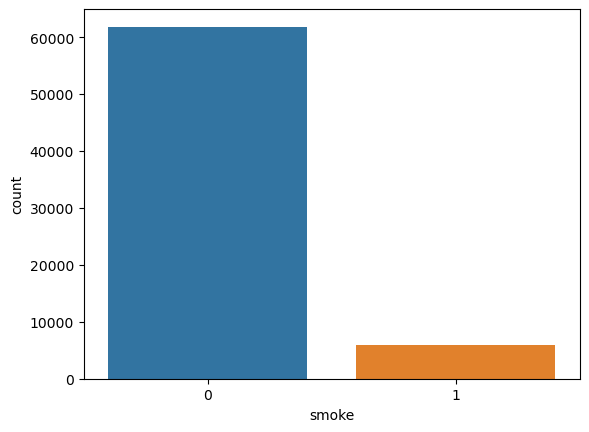

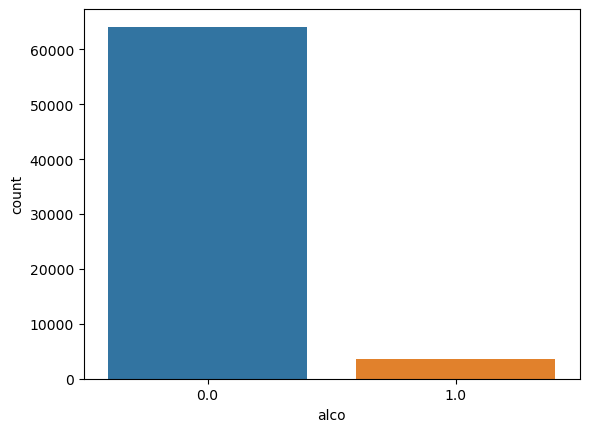

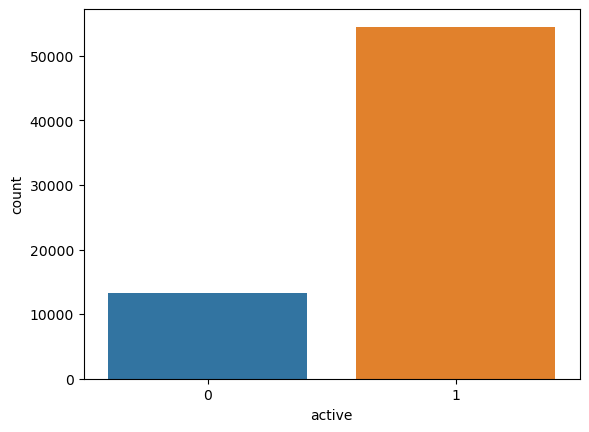

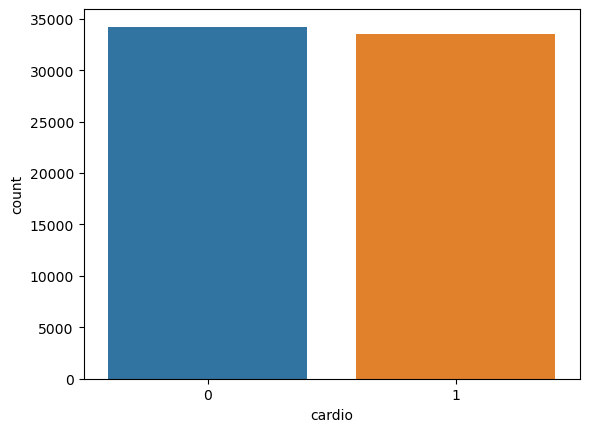

In [20]:
for i in cat:
    plt.figure()
    sns.countplot(x =i,data = df)
    plt.show()

### Finding coefficient of continuous data

In [21]:
#coefficient of continuous data

for i in con:
    print(i)
    lr = LogisticRegression()
    lr.fit(np.expand_dims(df[i], axis =1), df['cardio'])
    display(lr.score(np.expand_dims(df[i],axis =1), df['cardio']))

age


0.5978853168332915

height


0.5107137055687642

weight


0.5738883884401258

ap_hi


0.713882776850717

ap_lo


0.6623152236513726

bmi


0.5804598549847158

### Finding the correlation of coefficient between continuous data

In [22]:
#correlation of coefficient between continuous data

df_con = df.loc[:, ['age','height','weight','ap_hi','ap_lo','bmi', 'cardio']]
corr = df_con.corr()
display(corr)

,age,height,weight,ap_hi,ap_lo,bmi,cardio
age,1.000000,-0.086356,0.067943,0.196217,0.106074,0.118172,0.241804
height,-0.086356,1.000000,0.310007,0.004971,0.011872,-0.238353,-0.019080
weight,0.067943,0.310007,1.000000,0.236963,0.173782,0.845461,0.177642
ap_hi,0.196217,0.004971,0.236963,1.000000,0.500703,0.239056,0.400093
ap_lo,0.106074,0.011872,0.173782,0.500703,1.000000,0.170560,0.254848
bmi,0.118172,-0.238353,0.845461,0.239056,0.170560,1.000000,0.191194
cardio,0.241804,-0.019080,0.177642,0.400093,0.254848,0.191194,1.000000


In [23]:
df_con.corr()['cardio'].sort_values()

height   -0.019080
weight    0.177642
bmi       0.191194
age       0.241804
ap_lo     0.254848
ap_hi     0.400093
cardio    1.000000
Name: cardio, dtype: float64

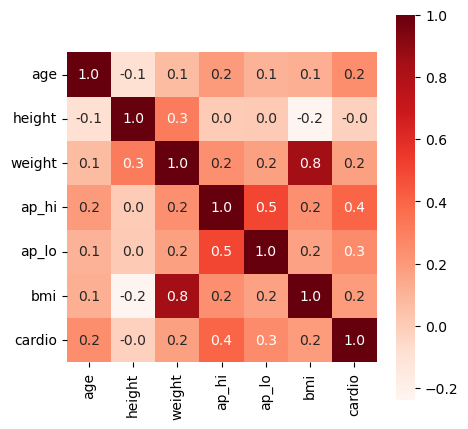

In [24]:
# correlation map(heatmap)

plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap= 'Reds', annot = True, square = True, fmt= '.1f')
plt.show()

# 7.0 Model Selection

## 7.1 Feature selecting according to the correlation calculated
 
and also seperating target variable from the data

In [25]:
# selecting feature according to correlation and coefficient
# dropping columns with < 0.01
X = df.drop(['cardio', 'gender', 'alco'],axis =1)
y = df['cardio']


## 7.2 Splitting the data using the train_test_split function

where random_state is 42 , test_size is 0.3

In [26]:
# train_test_split using random_state 42 as agreed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify= y)

## 7.3 Model Development

Making pipeline for most of the method for binary classification and storing it in a list

In [27]:

pipeline_mms_lr = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('logistic_regression', LogisticRegression())
])

pipeline_ss_lr = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

pipeline_gbc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('gradient_boosting_class', GradientBoostingClassifier())
])

pipeline_gbc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('gradient_boosting_class', GradientBoostingClassifier())
])

pipeline_svc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('svc', SVC())
])


pipeline_svc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline_rfc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
])
pipeline_rfc_mms = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('rfc', RandomForestClassifier())
])

pipeline_tree_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

In [28]:
# store pipeline in list

pipelines = [pipeline_ss_lr, pipeline_mms_lr,
            pipeline_gbc_ss, pipeline_gbc_mms,
            pipeline_svc_ss, pipeline_svc_mms,
            pipeline_rfc_ss, pipeline_rfc_mms]
            

# 8.0 Model Training

This can take some times as the data we using is very big

In [29]:
# train the pipelines(~ 8 min)

for pipe in pipelines:
    pipe.fit(X_train, y_train)

# 9.0 Model evaluation

storing all pipeline score in a dictionary

In [30]:


pipe_dict= {}
best_score = 0

model_name = ['ss + logreg', 'mms + logreg',
            'ss + gb', 'mms + gb',
            'ss + svc', 'mms + svc',
            'ss + rfc', 'mms + rfc']

## 9.1 Fitting the data into all pipeline and display the best of all

This will take some time depending on the data size and computational power

In [31]:
 ##Fit the data (~5 min)

for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)

    pipe_dict[model_name[i]]= [accuracy_score(y_test,y_pred),
                                f1_score(y_test,y_pred, average= 'weighted')]
    
    if model.score(X_test , y_test) > best_score:
        best_score = model.score(X_test , y_test)
        best_pipe = model_name[i]

print("The best model for heart attact prediction is {} with the accuracy of {}".format(best_pipe, best_score))
# printing the best model and its accuracy score

The best model for heart attact prediction is ss + gb with the accuracy of 0.7414353219137626


## 9.2 Tabulate the accuracy and the F1 score of each pipeline

In [32]:


model_comp_df = pd.DataFrame.from_dict(pipe_dict).T
model_comp_df.columns= ['Accuracy','F1 score']
model_comp_df = model_comp_df.sort_values('Accuracy', ascending= False)
model_comp_df.style.background_gradient(cmap = 'YlGn')

,Accuracy,F1 score
ss + gb,0.741435,0.741096
mms + gb,0.741435,0.741096
ss + svc,0.739614,0.738644
mms + svc,0.737842,0.737218
ss + logreg,0.735184,0.734569
mms + logreg,0.735086,0.734503
ss + rfc,0.710032,0.710038
mms + rfc,0.709589,0.709592


In [33]:
# could be the same, you could read the test file, separate the test data to test_data_X, test_y
# use your best model to y_pred_test = grid.predict(test_data_X)

# 10.0 Tuning the hyperparams of the best pipeline 

which in time of running StandardScaler + GradientBoosting by using GridSearchCV / RandomizedSearchCV

This will take some time depending on the data size and computational power

The pipeline is as following:-

In [34]:
# pipeline_gbc_ss = Pipeline([
#     ('standard_scaler', StandardScaler()),
#     ('gradient_boosting_class', GradientBoostingClassifier())
# ])


## 10.1 List of all the hyper_params of the pipeline

In [35]:
# getting all list of hyper_params for the pipeline
pipeline_gbc_ss.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standard_scaler', 'gradient_boosting_class', 'standard_scaler__copy', 'standard_scaler__with_mean', 'standard_scaler__with_std', 'gradient_boosting_class__ccp_alpha', 'gradient_boosting_class__criterion', 'gradient_boosting_class__init', 'gradient_boosting_class__learning_rate', 'gradient_boosting_class__loss', 'gradient_boosting_class__max_depth', 'gradient_boosting_class__max_features', 'gradient_boosting_class__max_leaf_nodes', 'gradient_boosting_class__min_impurity_decrease', 'gradient_boosting_class__min_samples_leaf', 'gradient_boosting_class__min_samples_split', 'gradient_boosting_class__min_weight_fraction_leaf', 'gradient_boosting_class__n_estimators', 'gradient_boosting_class__n_iter_no_change', 'gradient_boosting_class__random_state', 'gradient_boosting_class__subsample', 'gradient_boosting_class__tol', 'gradient_boosting_class__validation_fraction', 'gradient_boosting_class__verbose', 'gradient_boosting_class__warm_start'])

## 10.2 Choosing the hyper_params to tune

Code for both GridSearchCV and RandomizedSearchCV are provided , but the output are based on the RandomizedSearchCV, as the data is quite big so RandomizedSearchCV is typically faster while sacrifing some accuracy.

In [36]:
# grid_param = [{
#                 'gradient_boosting_class__learning_rate': [0.1 , 0.3 , 0.5],
#                 'gradient_boosting_class__n_estimators': [100 , 500 , 1000],
#                 'gradient_boosting_class__max_depth': [3, 5 , 7],
#                 'gradient_boosting_class__min_samples_split': [2, 4, 6],
#                 'gradient_boosting_class__min_samples_leaf' : [1, 3, 5],
#                 'gradient_boosting_class__max_features' : [9 , 3.17 , 3] # (max, log2 , sqrt2)
# }]
# grid_search = GridSearchCV(pipeline_gbc_ss , grid_param, cv = 5 ,verbose= 1, n_jobs= -1)

# grid = grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.score(X_test, y_test))
# display(grid.best_params_)

In [52]:

# 9~15min
grid_param = [{
                'gradient_boosting_class__learning_rate': [0.1,0.2,0.3,0.4,0.5],
                'gradient_boosting_class__n_estimators': [100 , 200 , 300],
                'gradient_boosting_class__max_depth': [3, 4 , 5],
                'gradient_boosting_class__min_samples_split': [2, 4, 6],
                'gradient_boosting_class__min_samples_leaf' : [1, 3, 5],
                'gradient_boosting_class__max_features' : [9 , 6 , 3] 
}]
randomized_search = RandomizedSearchCV(pipeline_gbc_ss , grid_param, cv = 5 ,verbose= 1, n_jobs= -1,n_iter = 100)

rando = randomized_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


## 10.3 Best score and the hyper_params used for it

In [53]:
print(randomized_search.score(X_test, y_test))

0.7421736562315416


In [54]:
display(rando.best_params_)

{'gradient_boosting_class__n_estimators': 100,
 'gradient_boosting_class__min_samples_split': 6,
 'gradient_boosting_class__min_samples_leaf': 5,
 'gradient_boosting_class__max_features': 9,
 'gradient_boosting_class__max_depth': 4,
 'gradient_boosting_class__learning_rate': 0.2}

## 10.4 Confusion matrix and classification report for the best pipeline

In [55]:

y_pred = rando.predict(X_test)

labels = ['No CVD', 'CVD']
cm =  confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names= labels)

In [56]:
print(cr)

              precision    recall  f1-score   support

      No CVD       0.73      0.78      0.75     10268
         CVD       0.76      0.71      0.73     10048

    accuracy                           0.74     20316
   macro avg       0.74      0.74      0.74     20316
weighted avg       0.74      0.74      0.74     20316



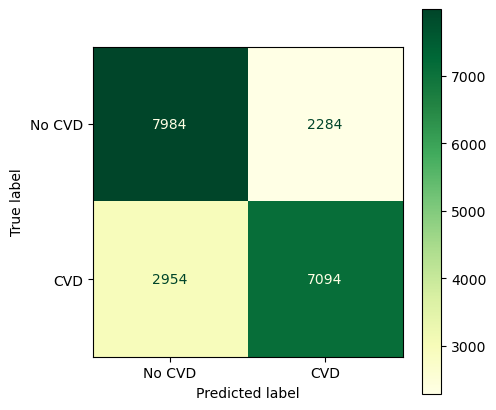

In [57]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= labels)
disp.plot(cmap= "YlGn")
plt.rcParams['figure.figsize']= [5,5]
plt.show()

# 11.0 Model Saving

In [58]:
## Model Saving


MODEL_PATH = os.path.join(os.getcwd(),'model.pkl')
# TEST_PATH

with open(MODEL_PATH, 'wb')as file:
    pickle.dump(rando.best_estimator_, file)

# 12.0 Testing the model with another data set

## Loading the data

In [32]:
test_df = pd.read_csv('test_set.csv', sep= ";") # data seperated by ';'
test_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,14791,2,165,60.0,120,80,1,1,0,0,0,0
1,2,11817,1,159,77.0,111,68,1,1,0,0,1,0
2,3,14531,2,181,95.0,129,90,1,1,1,1,1,0
3,4,16782,2,172,112.0,120,80,1,1,0,0,0,1
4,5,21197,2,167,92.0,140,80,1,1,0,0,1,1


## Model Selection

In [33]:
X = test_df.drop(['cardio', 'gender', 'alco', 'id'],axis =1)
y = test_df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42, stratify= y)

## Testing Using the best pipeline 

In [31]:
pipeline_gbc_ss = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('gradient_boosting_class', GradientBoostingClassifier())
])

pipeline_gbc_ss.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gradient_boosting_class', GradientBoostingClassifier())])

In [27]:
y_pred = pipeline_gbc_ss.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: ", acc)
print("F1 Score: ", f1)


Accuracy:  0.5
F1 Score:  0.3333333333333333


## Using the best_params_ values

In [34]:
pipeline_gbc_ss.set_params(gradient_boosting_class__n_estimators=100,
                           gradient_boosting_class__min_samples_split=6,
                           gradient_boosting_class__min_samples_leaf=5,
                           gradient_boosting_class__max_features=9,
                           gradient_boosting_class__max_depth=4,
                           gradient_boosting_class__learning_rate=0.2)


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('gradient_boosting_class',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=4,
                                            max_features=9, min_samples_leaf=5,
                                            min_samples_split=6))])

In [35]:
pipeline_gbc_ss.fit(X_train, y_train)
y_pred = pipeline_gbc_ss.predict(X_test)


In [36]:

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: ", acc)
print("F1 Score: ", f1)

Accuracy:  0.5
F1 Score:  0.3333333333333333
